In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

italy_url = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"

italy = pd.read_csv(italy_url)

In [2]:
#rename columns to translate from Italian to English. Also drop unused columns. 
italy.rename(columns={'data':'date', 'stato':'state', "ricoverati_con_sintomi":"hospitalized_with_symptoms", "terapia_intensiva":"intensive_care", "totale_ospedalizzati": "total_hospitalized",
                      "isolamento_domiciliare": "home_confined", "totale_positivi":"current_cases", "variazione_totale_positivi":"new_current_cases", "nuovi_positivi": "new_cases", "dimessi_guariti":"recovered",
                      "deceduti":"deaths", "totale_casi":"cases", "tamponi":"tests"}, inplace=True)
italy.drop(columns=["note_it", "note_en"], inplace=True)


In [3]:
italy.head()

,date,state,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_confined,current_cases,new_current_cases,new_cases,recovered,deaths,cases,tests
0,2020-02-24T18:00:00,ITA,101,26,127,94,221,0,221,1,7,229,4324
1,2020-02-25T18:00:00,ITA,114,35,150,162,311,90,93,1,10,322,8623
2,2020-02-26T18:00:00,ITA,128,36,164,221,385,74,78,3,12,400,9587
3,2020-02-27T18:00:00,ITA,248,56,304,284,588,203,250,45,17,650,12014
4,2020-02-28T18:00:00,ITA,345,64,409,412,821,233,238,46,21,888,15695


In [4]:
#Strip date info and convert to datetime
italy['date'] = italy['date'].apply(lambda x: str(x)[:10])
italy['date'] = pd.to_datetime(italy['date'])

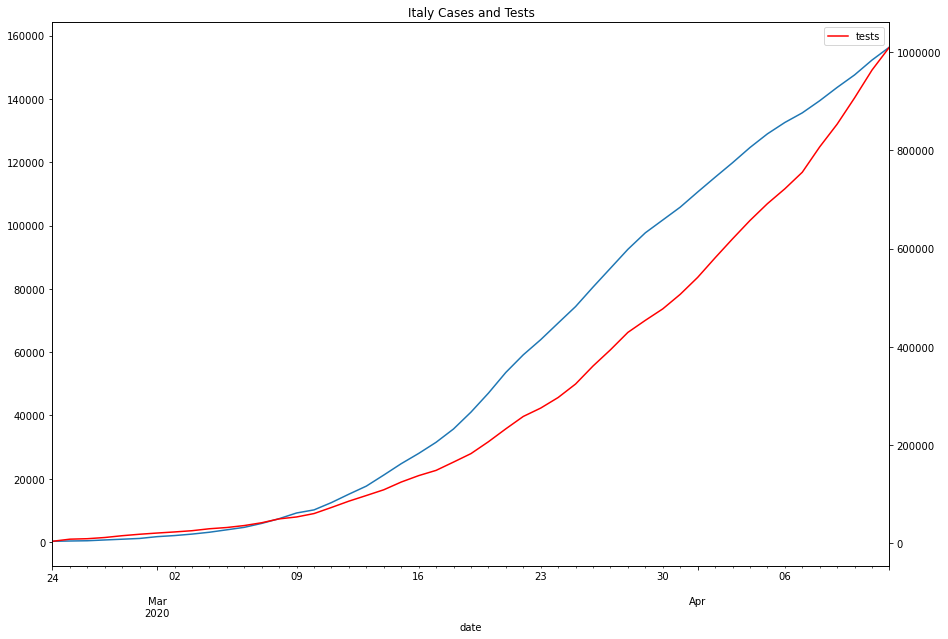

In [5]:
#line graphs for cases and tests over time in Italy
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = italy.query('cases >= 100')
df.plot(x="date", y="cases", legend=False, ax=ax, title="Italy Cases and Tests")
ax2 = ax.twinx()
ax2.get_yaxis().get_major_formatter().set_scientific(False)
df.plot(x="date", y="tests", legend=True, ax=ax2, color="red")
plt.show();

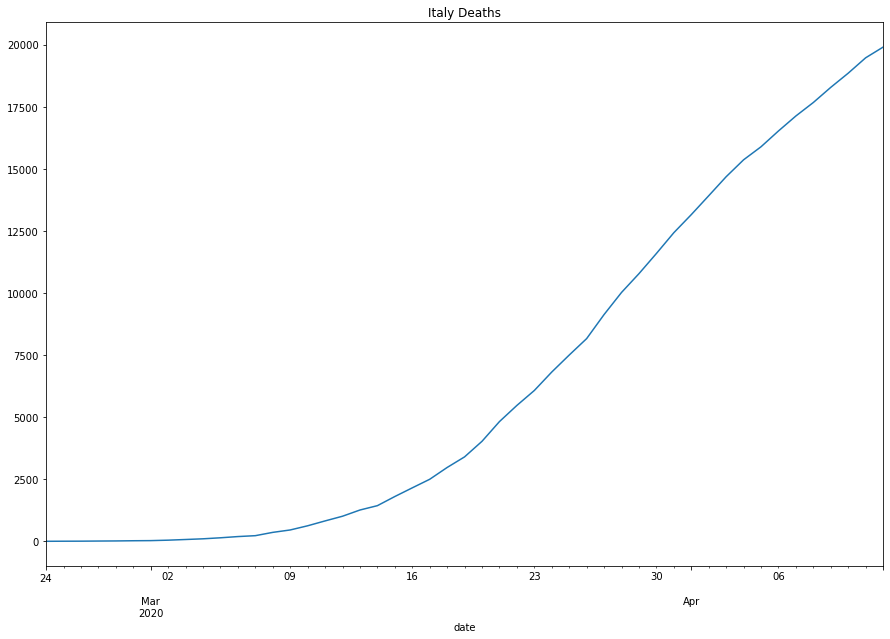

In [6]:
#line graph for deaths in Italy overtime
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = italy.query('cases >= 100')
df.plot(x="date", y="deaths", legend=False, ax=ax, title="Italy Deaths")

plt.show();

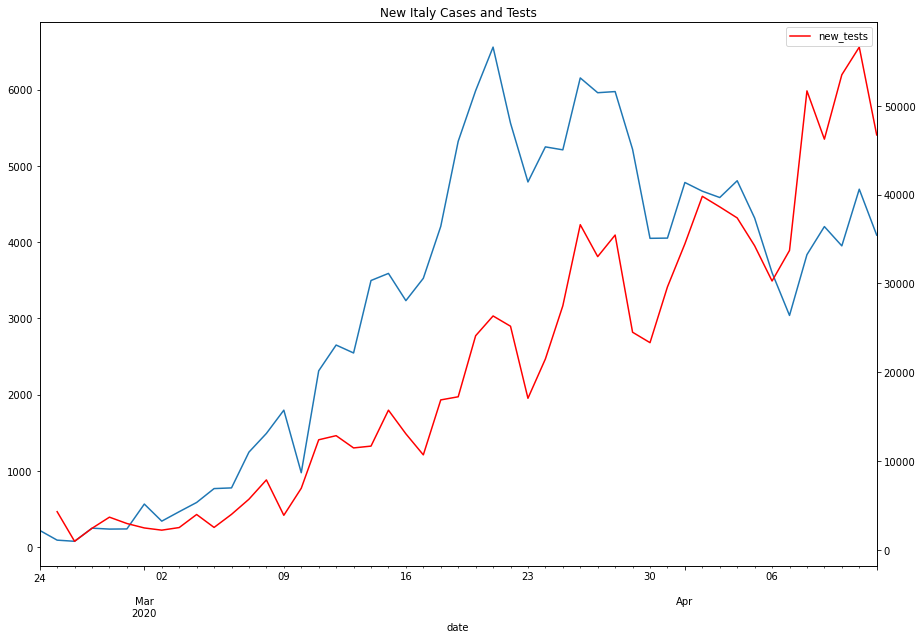

In [7]:
#line graphs for increase in cases and tests over time in Italy
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = italy.query('cases >= 100')
df.plot(x="date", y="new_cases", legend=False, ax=ax, title="New Italy Cases and Tests")
ax2 = ax.twinx()
df['new_tests'] = df.tests.diff().values
ax2.get_yaxis().get_major_formatter().set_scientific(False)
df.plot(x="date", y="new_tests", legend=True, ax=ax2, color="red")
plt.show();

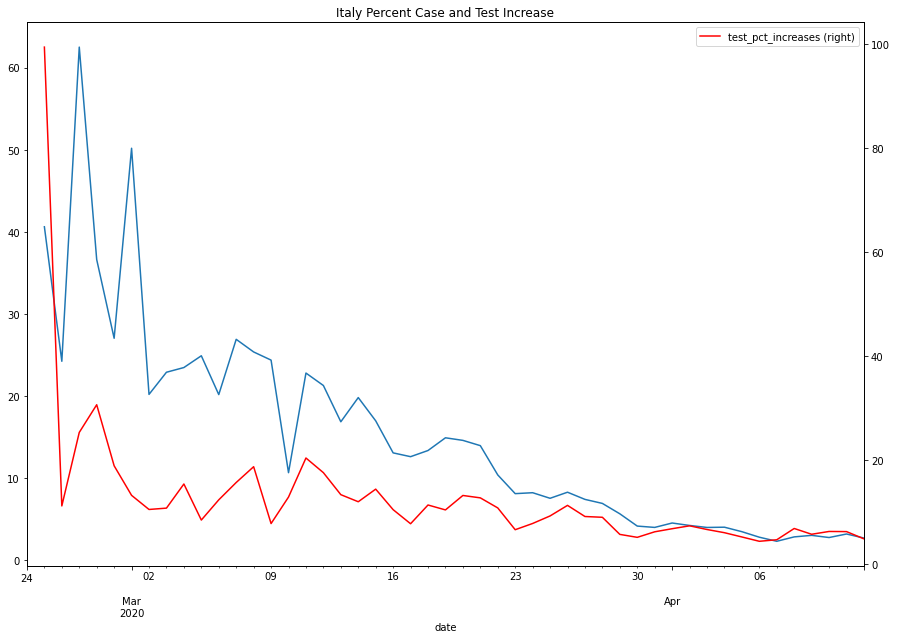

In [8]:
#line graphs for percent increase in cases and tests over time in Italy
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = italy.query('cases >= 100')
df['new_pct_cases'] = df.cases.pct_change().values * 100
df.plot(x="date", y="new_pct_cases", legend=False, ax=ax, title="Italy Percent Case and Test Increase")
ax2 = ax.twinx()
df['test_pct_increases'] = df.tests.pct_change().values * 100
ax2.get_yaxis().get_major_formatter().set_scientific(False)
df.plot(x="date", y="test_pct_increases", legend=True, ax=ax2, color="red", secondary_y=True)
plt.show();

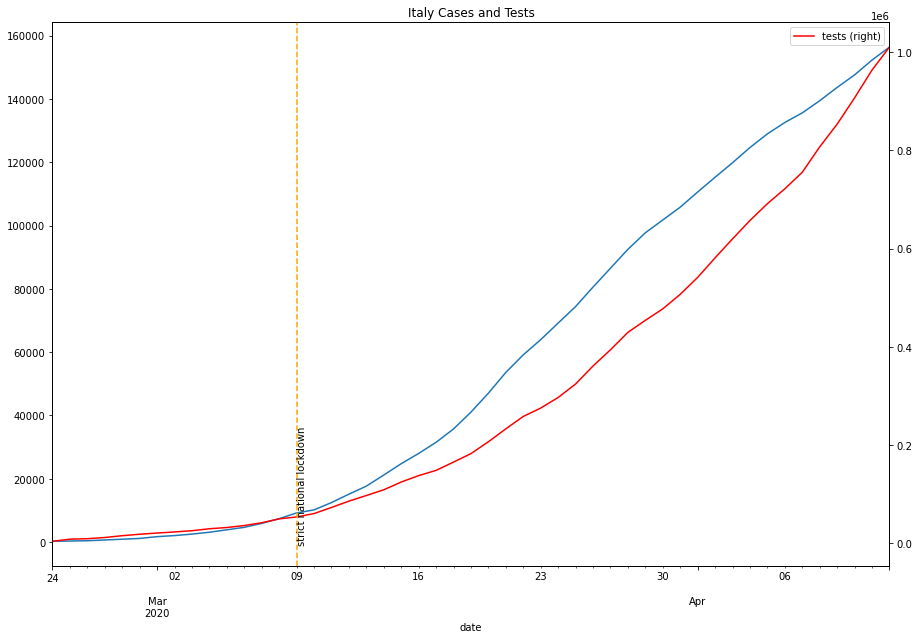

In [9]:
#line graphs for cases and tests over time in Italy with time of severe national lockdown
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = italy.query('cases >= 100')
df.plot(x="date", y="cases", legend=False, ax=ax, title="Italy Cases and Tests")
ax2 = ax.twinx()
ax2.get_yaxis().get_major_formatter().set_scientific(False)
df.plot(x="date", y="tests", legend=True, ax=ax2, color="red", secondary_y=True)
plt.axvline("2020-03-09", linestyle='--', color='orange')
plt.text("2020-03-09", 4, "strict national lockdown", rotation=90)
plt.show();

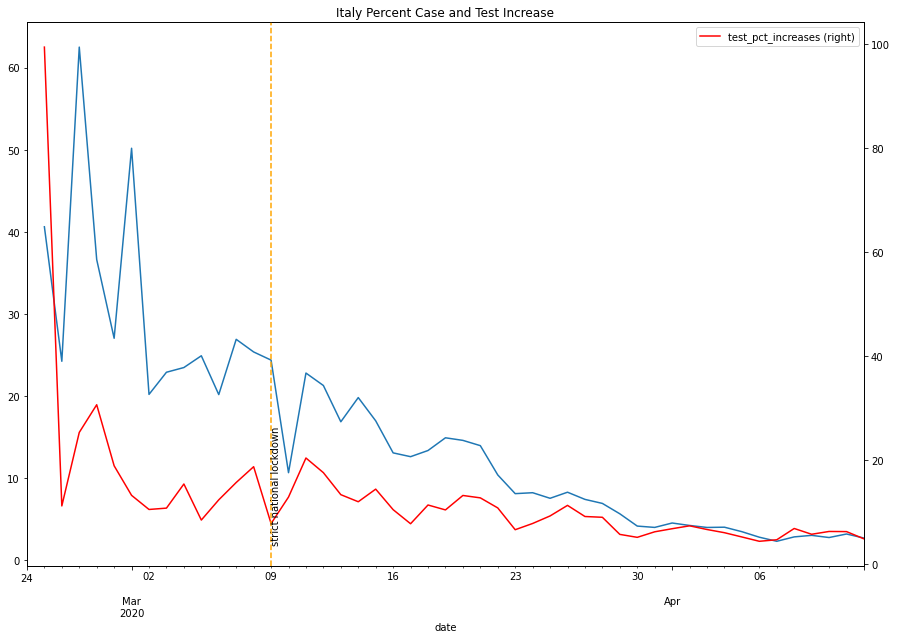

In [10]:
#line graphs for percentage increase in cases and tests over time in Italy with legislation
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = italy.query('cases >= 100')
df['new_pct_cases'] = df.cases.pct_change().values * 100
df.plot(x="date", y="new_pct_cases", legend=False, ax=ax, title="Italy Percent Case and Test Increase")
ax2 = ax.twinx()
df['test_pct_increases'] = df.tests.pct_change().values * 100
ax2.get_yaxis().get_major_formatter().set_scientific(False)
df.plot(x="date", y="test_pct_increases", legend=True, ax=ax2, color="red", secondary_y=True)
plt.axvline("2020-03-09", linestyle='--', color='orange')
plt.text("2020-03-09", 4, "strict national lockdown", rotation=90)
plt.show();

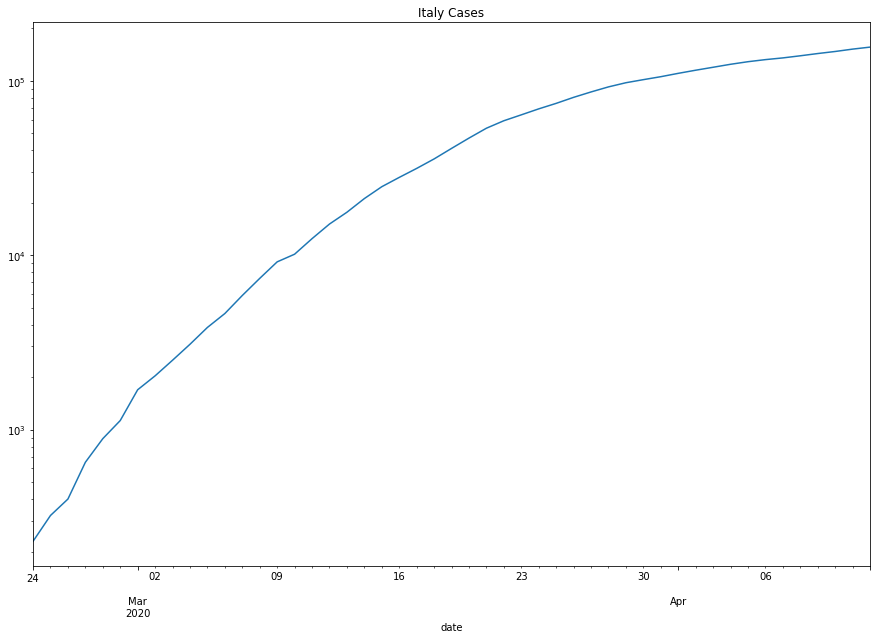

In [11]:
#line graphs for cases over time in Italy on a logarithmic scale for enhanced clarity
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = italy.query('cases >= 100')
df.plot(x="date", y="cases", legend=False, ax=ax, title="Italy Cases", logy=True)
plt.show();

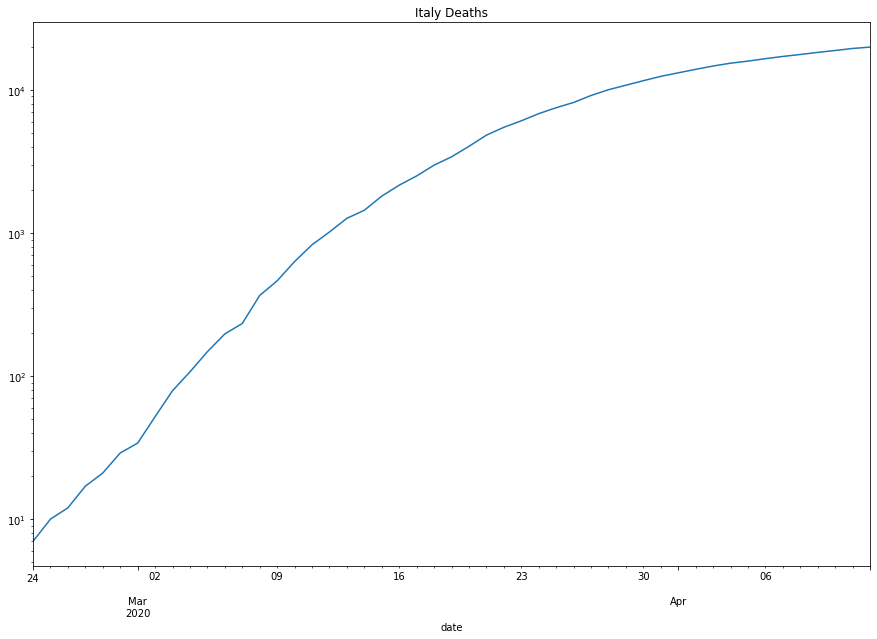

In [12]:
#line graphs for deaths over time in Italy on a logarithmic scale for enhanced clarity
fig, ax = plt.subplots(1,1, figsize=(15,10));
df = italy.query('cases >= 100')
df.plot(x="date", y="deaths", legend=False, ax=ax, title="Italy Deaths", logy=True)
plt.show();